In [158]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [159]:
x,y = make_regression(n_samples = 300, n_features = 1, n_informative = 1, n_targets = 1, noise = 30,random_state = 0)

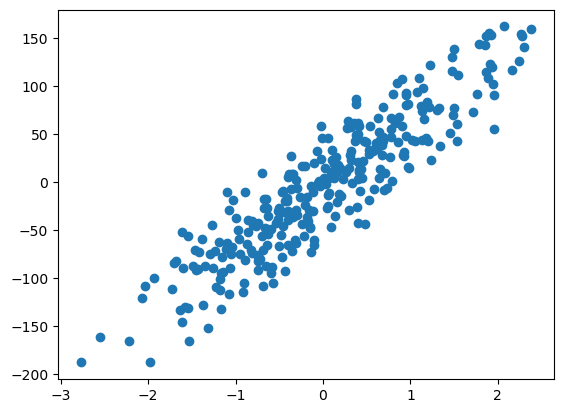

In [160]:
plt.scatter(x,y)

In [161]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,test_size = 0.2)

In [162]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [163]:
print(lr.coef_)
print(lr.intercept_)

[65.47200316]
-4.946372492620008


In [164]:
y_pred = lr.predict(x_test)

In [165]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8023862935859893


In [166]:
class GDRegression:
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = 0
        self.LR = learning_rate
        self.epochs = epochs
        self.loss_slop_b = None
        self.step_size_b = None
        self.loss_slop_m = None
        self.step_size_m = None
    
    def fit(self,x,y):
        x = x.ravel()
        for i in range(0,self.epochs):
            
            self.loss_slop_b = -2 * np.sum(y - self.m * x.ravel() - self.b)
            self.loss_slop_m = -2 * np.sum((y - self.m * x.ravel() - self.b)* x.ravel()) 
            
            self.step_size_b = self.LR * self.loss_slop_b 
            self.step_sixe_m = self.LR * self.loss_slop_m
            
            self.b = self.b - self.step_size_b
            self.m = self.m - self.step_sixe_m
        
    def pridict(self,x):
        for i in range(0,self.epochs):
            y_pred = self.m * x + self.b
        return y_pred
            

In [167]:
gdr = GDRegression(0.001,45)

In [168]:
gdr.fit(x_train,y_train)
y_pred = gdr.pridict(x_test)

In [169]:
print(r2_score(y_test,y_pred))

0.8023862935859354


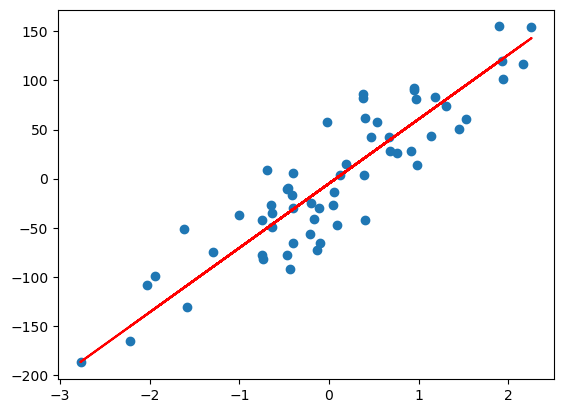

In [170]:
plt.scatter(x_test,y_test)
plt.plot(x_test, y_pred, color = "Red")

In [171]:
gdr.m

np.float64(65.47200315692655)

In [172]:
gdr.b

np.float64(-4.946372492631851)